In [123]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [124]:
input_file = 'star_dataset/6_class_csv.csv'
data_wt_label=pd.read_csv(input_file, header = 0)

In [125]:
data_wt_label.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [126]:
### Missing values in each column ###
data_wt_label.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [127]:
data_wt_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [128]:
data_wt_label.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [129]:
### checking for class imbalance ###
data_wt_label['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

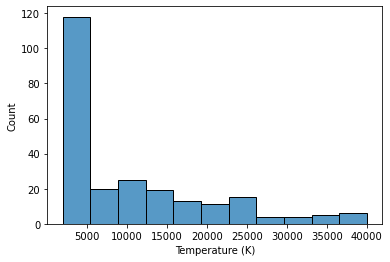

In [130]:
#Histogram of all features
sns.histplot(data_wt_label["Temperature (K)"])
plt.show()

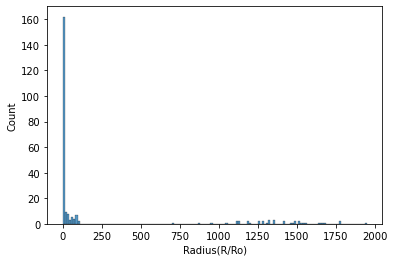

In [131]:
sns.histplot(data_wt_label["Radius(R/Ro)"])
plt.show()

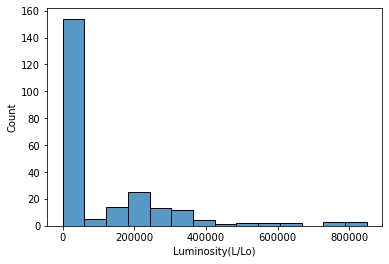

In [132]:
sns.histplot(data_wt_label["Luminosity(L/Lo)"])
plt.show()

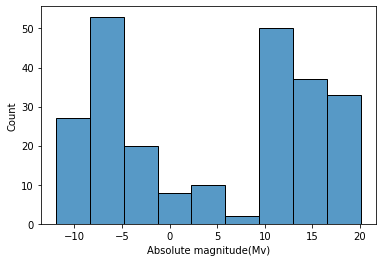

In [133]:
sns.histplot(data_wt_label["Absolute magnitude(Mv)"])
plt.show()

In [134]:
#data_wt_label.hist(figsize=(15,12),bins = 15)
#plt.title("Features Distribution")
#plt.show()

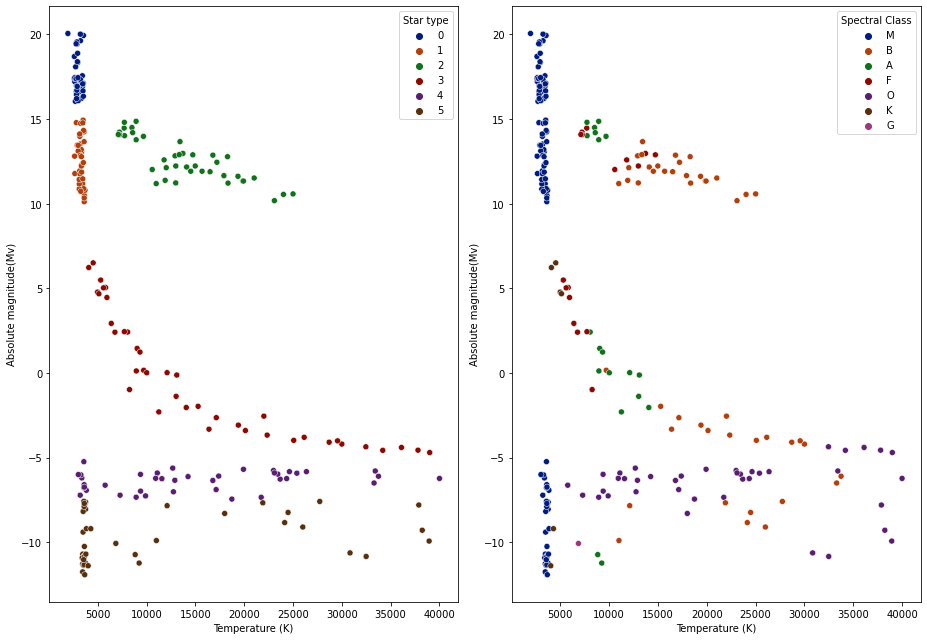

In [135]:
### visualize HR-diagram with our data ###
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=data_wt_label,hue='Star type',ax=ax[0],palette='dark')
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=data_wt_label,hue='Spectral Class',ax=ax[1],palette='dark')
plt.tight_layout()
plt.show()

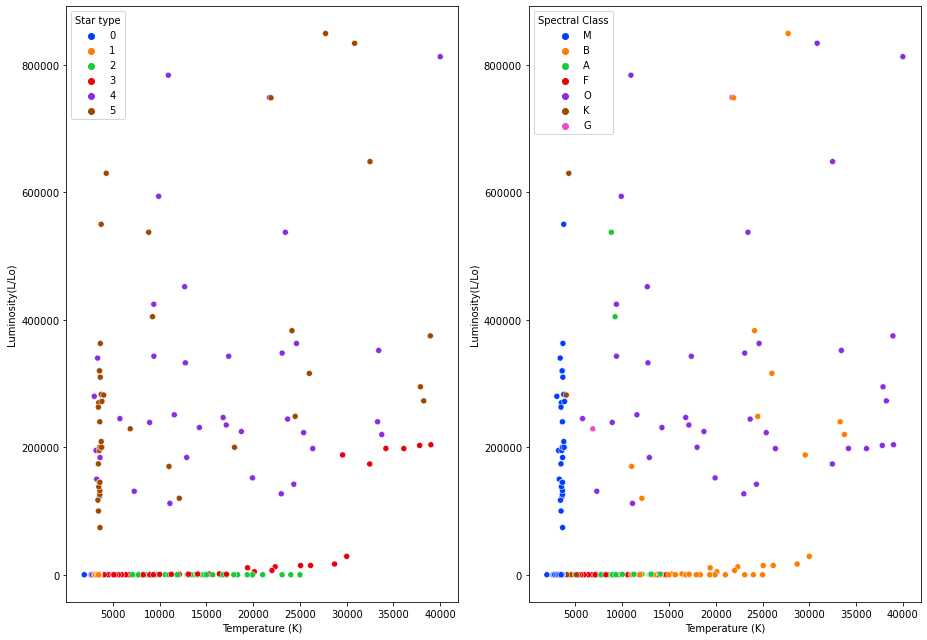

In [136]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=data_wt_label,hue='Star type',ax=ax[0],palette='bright')
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=data_wt_label,hue='Spectral Class',ax=ax[1],palette='bright')
plt.tight_layout()
plt.show()

In [137]:
data_wt_label

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


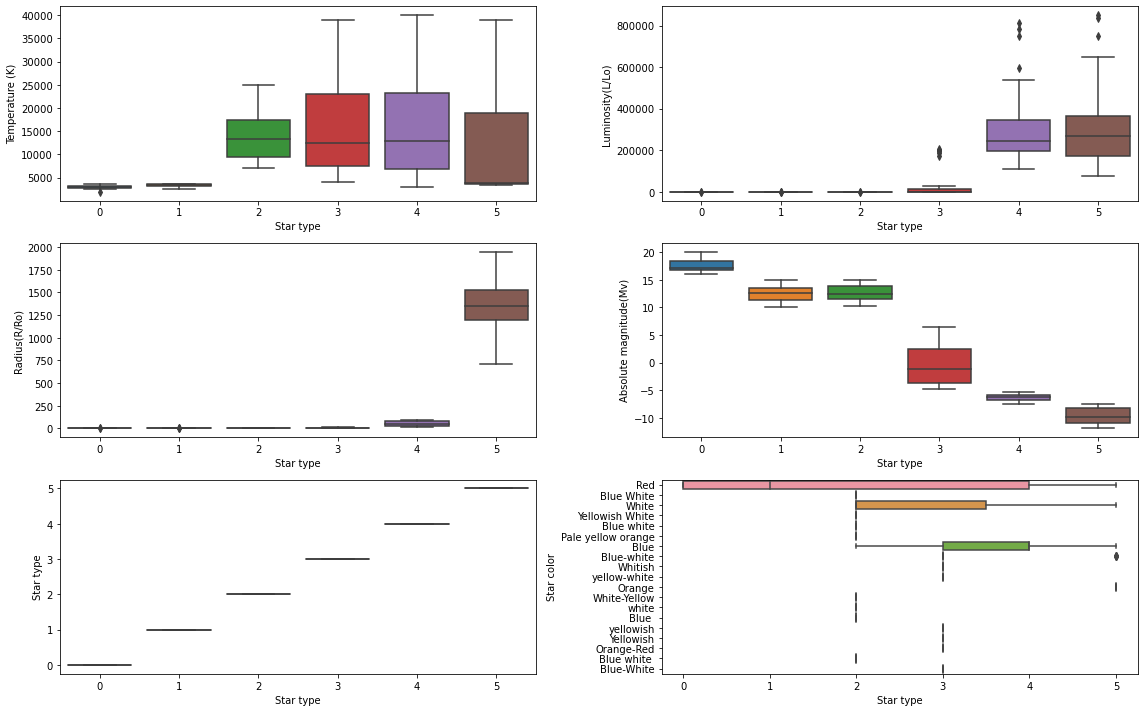

In [138]:
fig,ax = plt.subplots(nrows = 3, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(data_wt_label.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data_wt_label["Star type"], y = data_wt_label[data_wt_label.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

#### Target [Star Type]
Brown Dwarf -> Star Type = 0 \
Red Dwarf -> Star Type = 1 \
White Dwarf-> Star Type = 2 \
Main Sequence -> Star Type = 3 \
Supergiant -> Star Type = 4 \
Hypergiant -> Star Type = 5

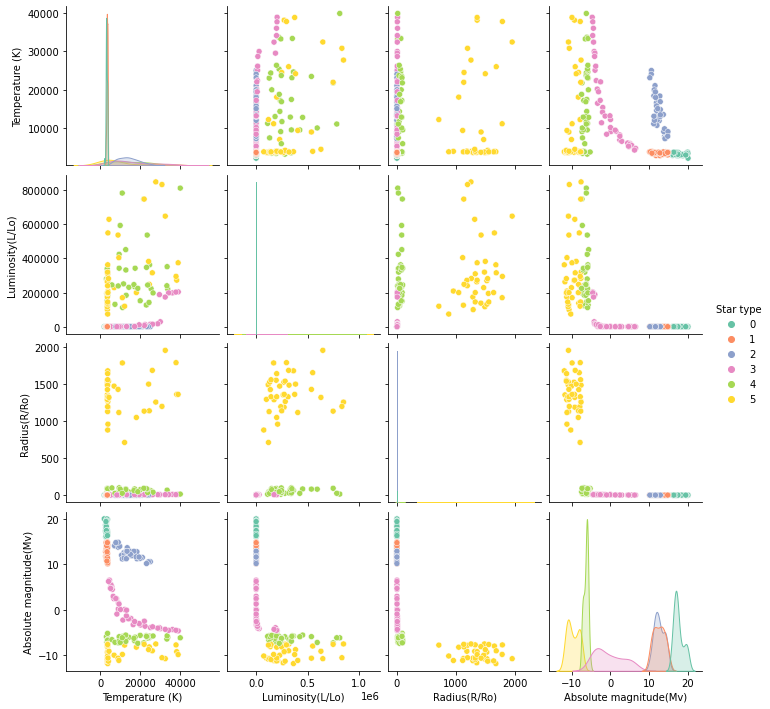

In [139]:
sns.pairplot(data=data_wt_label,hue="Star type",palette="Set2")
plt.show()

In [140]:
### Split dataframe into categorical and numeric features ### 
df_cat = data_wt_label.select_dtypes(exclude=np.number)
df_num = data_wt_label.select_dtypes(include=np.number)

In [141]:
df_cat.head(2)

,Star color,Spectral Class
0,Red,M
1,Red,M


In [142]:
df_num.head(2)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.0024,0.1700,16.12,0
1,3042,0.0005,0.1542,16.60,0


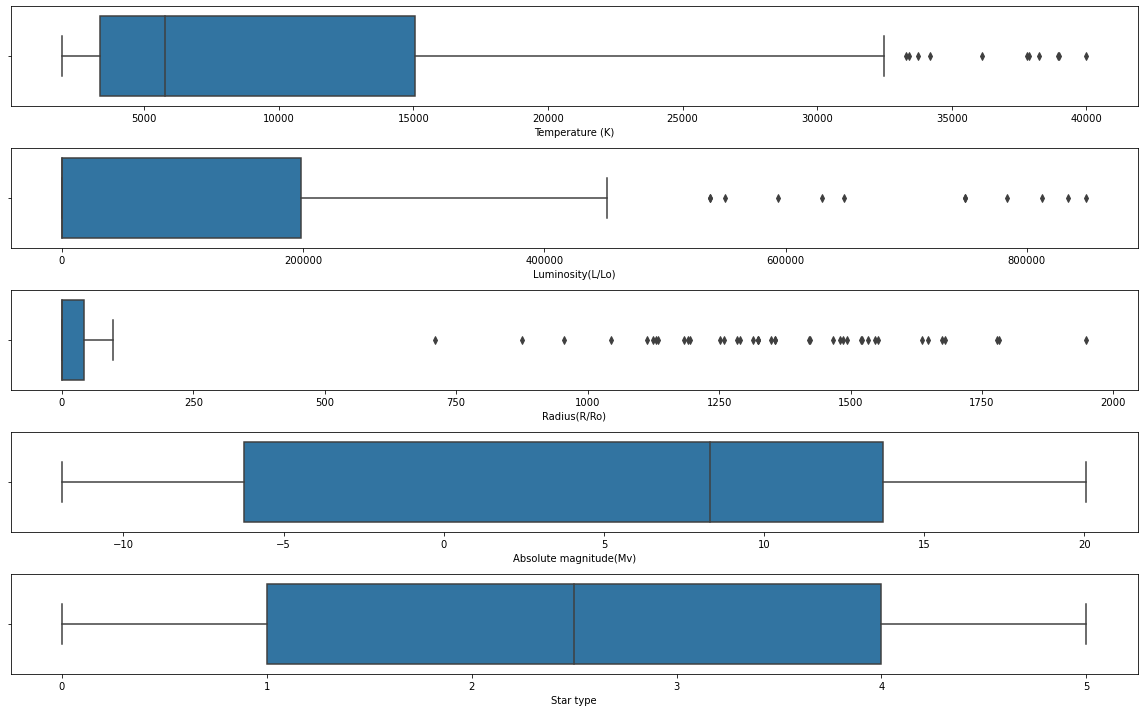

In [143]:
### visualizing outliers ###
fig,ax=plt.subplots(len(df_num.columns),figsize=(16,10))
for i in range(len(df_num.columns)):
    sns.boxplot(x = df_num.iloc[:,i],ax=ax[i],hue=data_wt_label['Star type'])
    plt.tight_layout()
plt.show()

In [144]:
### Scaling of features ###
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns)
df_scaled_num.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385
1,-0.782110,-0.598624,-0.459241,1.162414,-1.46385
2,-0.828477,-0.598624,-0.459342,1.362213,-1.46385
3,-0.807496,-0.598624,-0.459229,1.167171,-1.46385
4,-0.897819,-0.598624,-0.459340,1.491607,-1.46385


In [145]:
### Encoding categorical variables ###
encoded_cat=pd.get_dummies(df_cat,drop_first=True)
encoded_cat.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [146]:
### Combining scaled numeric variables and encoded categorical variables ###
df = pd.concat([encoded_cat,df_scaled_num],axis=1)
df.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.782110,-0.598624,-0.459241,1.162414,-1.46385
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.828477,-0.598624,-0.459342,1.362213,-1.46385
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.807496,-0.598624,-0.459229,1.167171,-1.46385
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.897819,-0.598624,-0.459340,1.491607,-1.46385


In [147]:
### Removing labels ###
x_scaled = df.drop('Star type',axis=1)
x_scaled.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.779382,-0.598624,-0.459210,1.116745
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.782110,-0.598624,-0.459241,1.162414
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.828477,-0.598624,-0.459342,1.362213
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.807496,-0.598624,-0.459229,1.167171
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.897819,-0.598624,-0.459340,1.491607


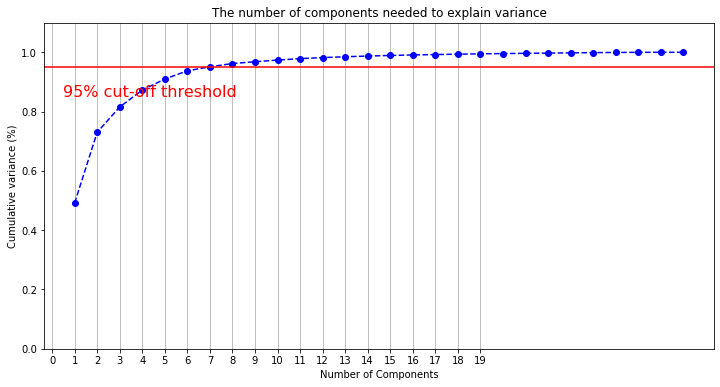

In [148]:
### Find Number of componenets ###
pca = PCA().fit(x_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

xi = np.arange(1, 29, step=1)
#print("xi: ",xi.shape)
y = np.cumsum(pca.explained_variance_ratio_)
#print("y: ",y.shape)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [149]:
### PCA ###
pca = PCA(n_components=20)
x_pca = pca.fit_transform(x_scaled)
print("Dimensionality Reduced features: ",x_pca.shape)
print("X scaled features: ",x_scaled.shape)
#pca.get_covariance()

Dimensionality Reduced features:  (240, 20)
X scaled features:  (240, 28)


([<matplotlib.axis.XTick at 0x1220321e790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

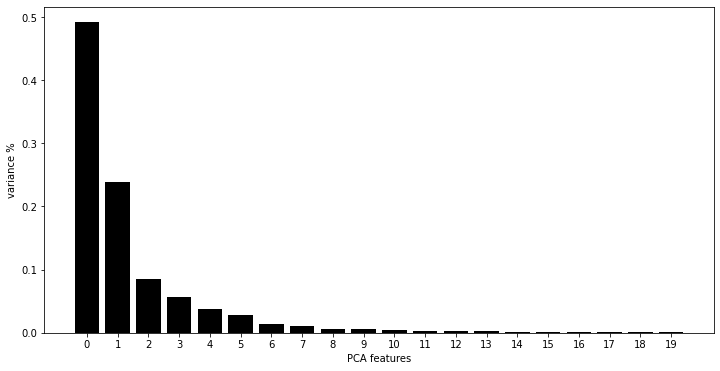

In [150]:
### Plot the explained variances ###
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [151]:
### PCA ###
pca = PCA(n_components=7)
#pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(x_scaled)
print("Dimensionality Reduced features: ",x_pca.shape)
print("X scaled features: ",x_scaled.shape)
#pca.get_covariance()

Dimensionality Reduced features:  (240, 7)
X scaled features:  (240, 28)


In [152]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(x_pca)

Text(0, 0.5, 'PCA 2')

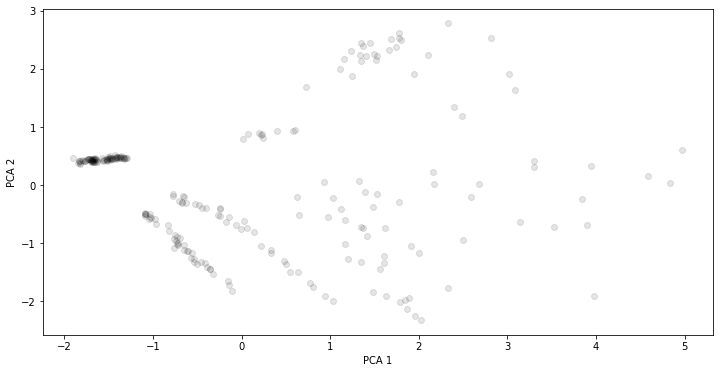

In [153]:
### Component pattern plot ###
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 4')

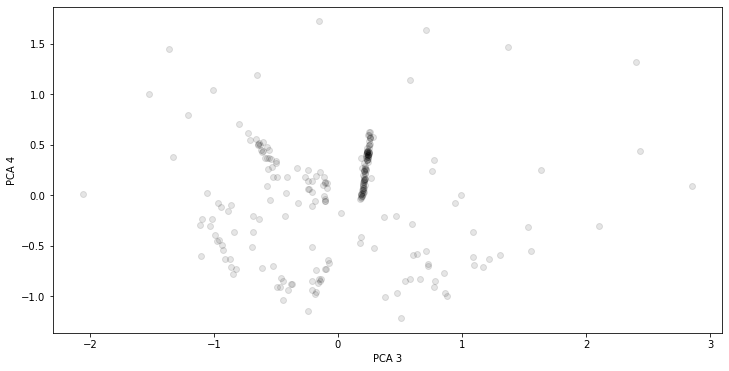

In [154]:
plt.scatter(PCA_components[2], PCA_components[3], alpha=.1, color='black')
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')

Text(0, 0.5, 'PCA 6')

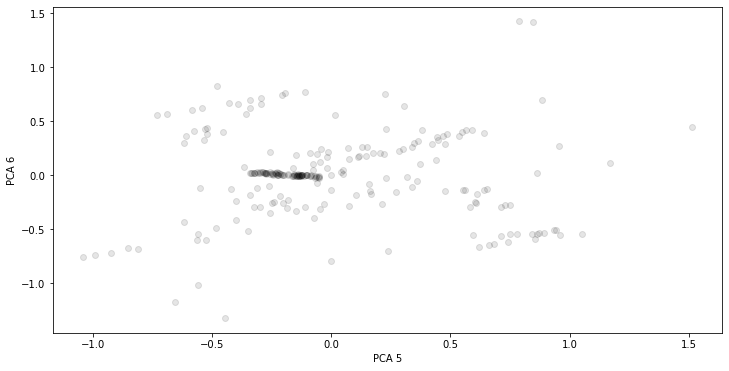

In [155]:
plt.scatter(PCA_components[4], PCA_components[5], alpha=.1, color='black')
plt.xlabel('PCA 5')
plt.ylabel('PCA 6')

Text(0, 0.5, 'PCA 7')

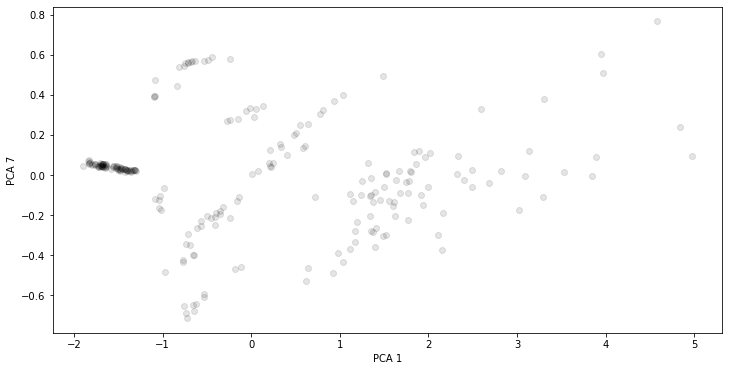

In [156]:
plt.scatter(PCA_components[0], PCA_components[6], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 7')

Text(0, 0.5, 'PCA 3')

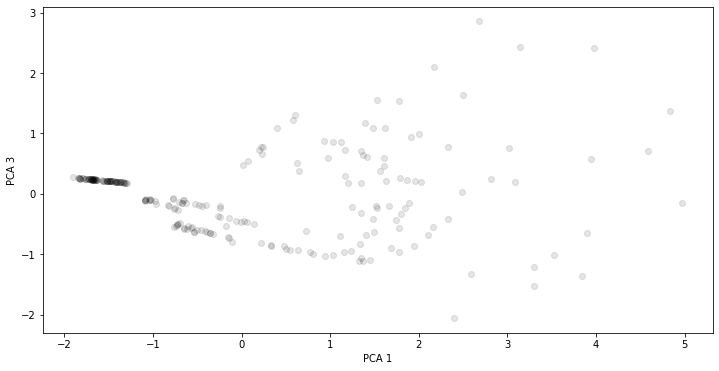

In [157]:
plt.scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

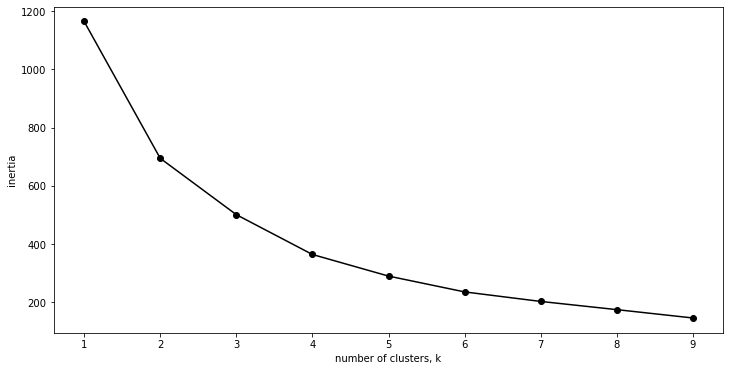

In [158]:
### Find Clusters (Elbow method) ###
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:6])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [120]:
### K-Means ### 
kmeans = KMeans(n_clusters=4)
k_labels = kmeans.fit_predict(PCA_components)

In [121]:
PCA_components['Cluster'] = k_labels

In [122]:
PCA_components.head()

,0,1,2,3,4,5,6,Cluster
0,-1.638570,0.435655,0.231810,0.349740,-0.153964,0.004484,0.043579,1
1,-1.665394,0.431966,0.235546,0.381629,-0.139685,0.002354,0.045672,1
2,-1.796438,0.437780,0.258255,0.507715,-0.063903,-0.000986,0.048820,1
3,-1.678171,0.447582,0.240579,0.375157,-0.128496,0.006493,0.041509,1
4,-1.896920,0.466629,0.280211,0.574047,0.000375,0.003670,0.043997,1
